# IMPORT LIBRARY

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

# LOAD DATASET

In [34]:
bmw_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projek Pertama Machine Learning Terapan Dicoding/BMW_Data.csv')
bmw_data

,Date,Adj_Close,Close,High,Low,Open,Volume
0,1996-11-08,8.100290,18.171000,18.209999,18.171000,18.209999,767000
1,1996-11-11,8.078445,18.122000,18.200001,18.082001,18.190001,260000
2,1996-11-12,8.139520,18.259001,18.327999,18.091999,18.160999,1066000
3,1996-11-13,8.126592,18.230000,18.344000,18.190001,18.344000,793000
4,1996-11-14,8.152893,18.289000,18.289000,18.132000,18.205000,351000
...,...,...,...,...,...,...,...
7207,2024-12-19,77.279999,77.279999,78.379997,76.900002,77.080002,1297262
7208,2024-12-20,77.580002,77.580002,77.860001,76.120003,76.699997,2000177
7209,2024-12-23,76.940002,76.940002,77.680000,76.260002,77.620003,642208
7210,2024-12-27,78.339996,78.339996,78.459999,76.739998,76.879997,958948


# EDA (EKSPLORATORY DATA ANALYSIS)
Disini saya melihat informasi data mulai dari tipe data masing - masing kolom dan juga jumlah column yang ada.

## Informasi Data

In [35]:
# Melihat informasi data
bmw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7212 entries, 0 to 7211
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7212 non-null   object 
 1   Adj_Close  7212 non-null   float64
 2   Close      7212 non-null   float64
 3   High       7212 non-null   float64
 4   Low        7212 non-null   float64
 5   Open       7212 non-null   float64
 6   Volume     7212 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 394.5+ KB


In [36]:
# Melihat statistik deskriptif data
bmw_data.describe()

,Adj_Close,Close,High,Low,Open,Volume
count,7212.000000,7212.000000,7212.000000,7212.000000,7212.000000,7.212000e+03
mean,36.020199,56.427535,57.111143,55.720695,56.446728,2.107946e+06
std,23.641099,25.245886,25.415148,25.055661,25.252263,1.467180e+06
min,8.065074,17.040001,17.815001,16.000000,17.280001,0.000000e+00
25%,16.443254,34.457500,34.900002,33.887500,34.465001,1.194308e+06
50%,26.329212,49.372501,50.094999,48.752501,49.267500,1.793778e+06
75%,53.329208,79.332500,80.105000,78.342497,79.379997,2.636572e+06
max,108.059044,122.599998,123.750000,120.349998,123.300003,2.871954e+07


In [37]:
# Mengecek apakah ada nilai yang null dalam data
bmw_data.isnull().sum()

,0
Date,0
Adj_Close,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [38]:
# Mengecek jumlah data yang duplikat
bmw_data.duplicated().sum()

0

## Mengecek Outlier

<Axes: xlabel='Adj_Close'>

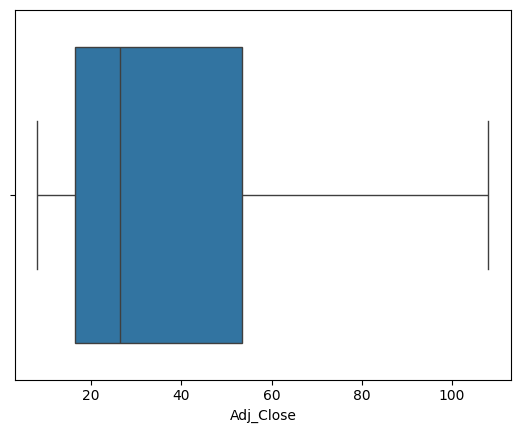

In [39]:
sns.boxplot(x=bmw_data['Adj_Close'])

<Axes: xlabel='Close'>

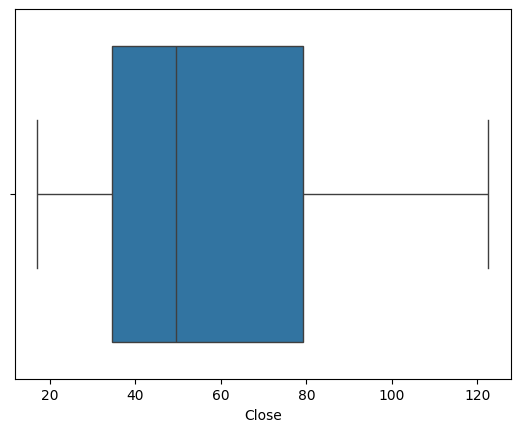

In [40]:
sns.boxplot(x=bmw_data['Close'])

<Axes: xlabel='High'>

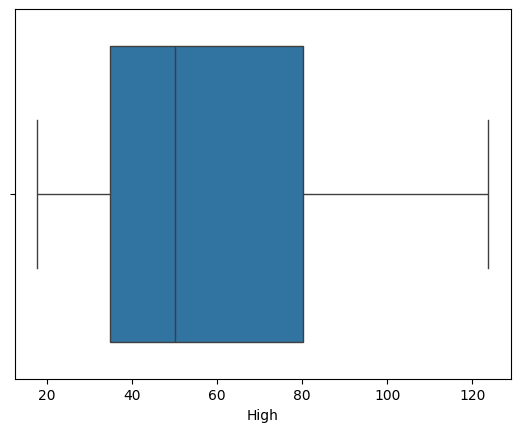

In [41]:
sns.boxplot(x=bmw_data['High'])

<Axes: xlabel='Low'>

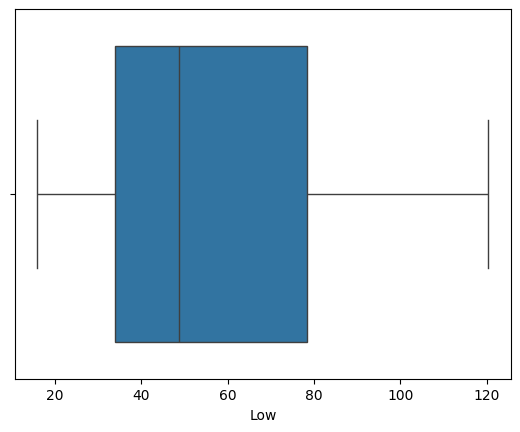

In [42]:
sns.boxplot(x=bmw_data['Low'])

<Axes: xlabel='Open'>

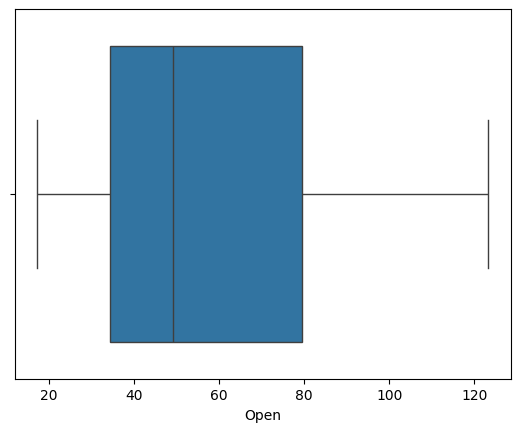

In [43]:
sns.boxplot(x=bmw_data['Open'])

<Axes: xlabel='Volume'>

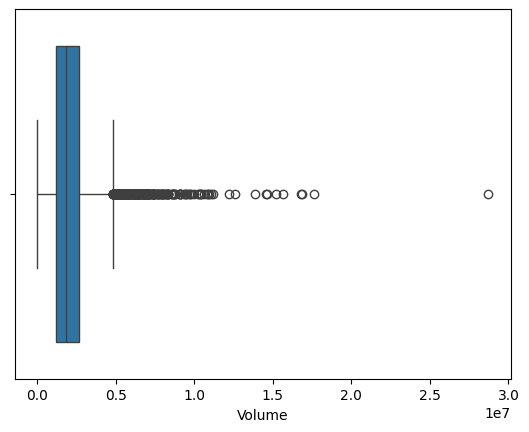

In [44]:
sns.boxplot(x=bmw_data['Volume'])

## Analisis Tren Harga Saham

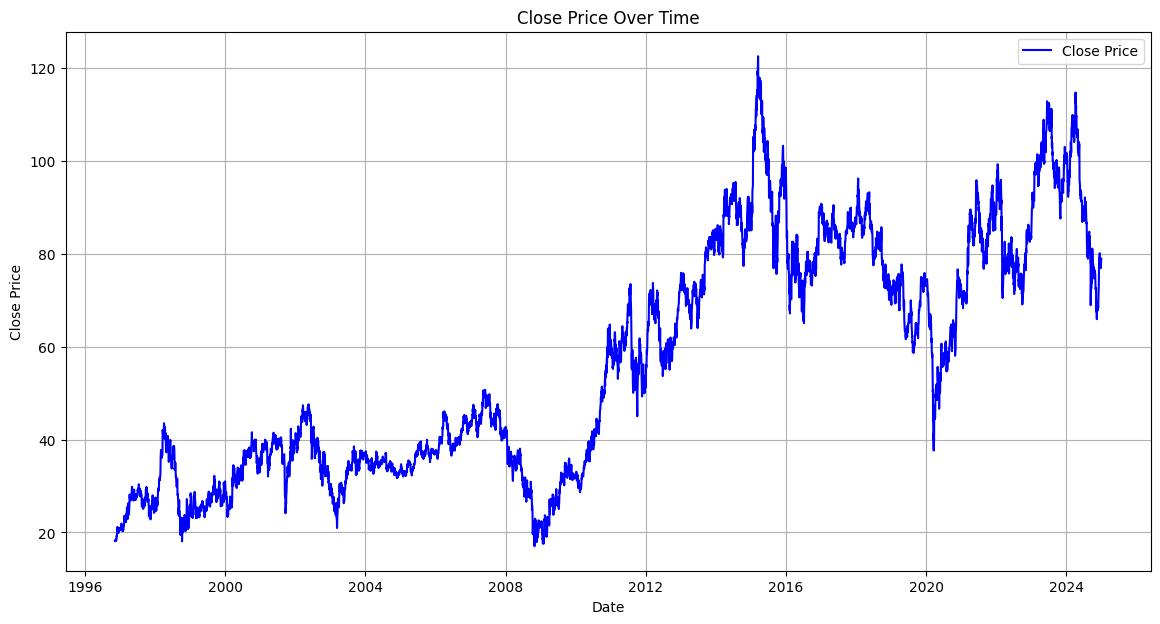

In [45]:
# Mengubah kolom Date menjadi datetime agar dapat melihat tren dari data
bmw_data['Date'] = pd.to_datetime(bmw_data['Date'])

# Mengubah kolom Date menjadi index untuk time series analysis
bmw_data.set_index('Date', inplace=True)

# Plotting the Close price over time
plt.figure(figsize=(14, 7))
plt.plot(bmw_data.index, bmw_data['Close'], label='Close Price', color='blue')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()

## Melihat Korelasi antara feature numerik

Disini saya ingin melihat korelasi antar kolom yang dapat memepengaruhi harga saham BMW

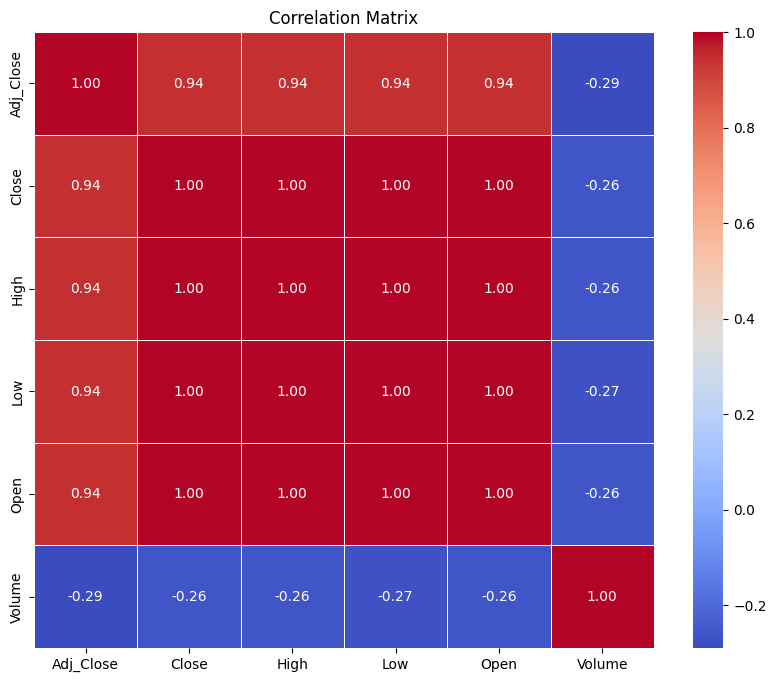

In [46]:
# Melihat Korelasi menggunakan matriks korelasi
correlation_matrix = bmw_data.corr().round(2)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,)
plt.title('Correlation Matrix')
plt.show()


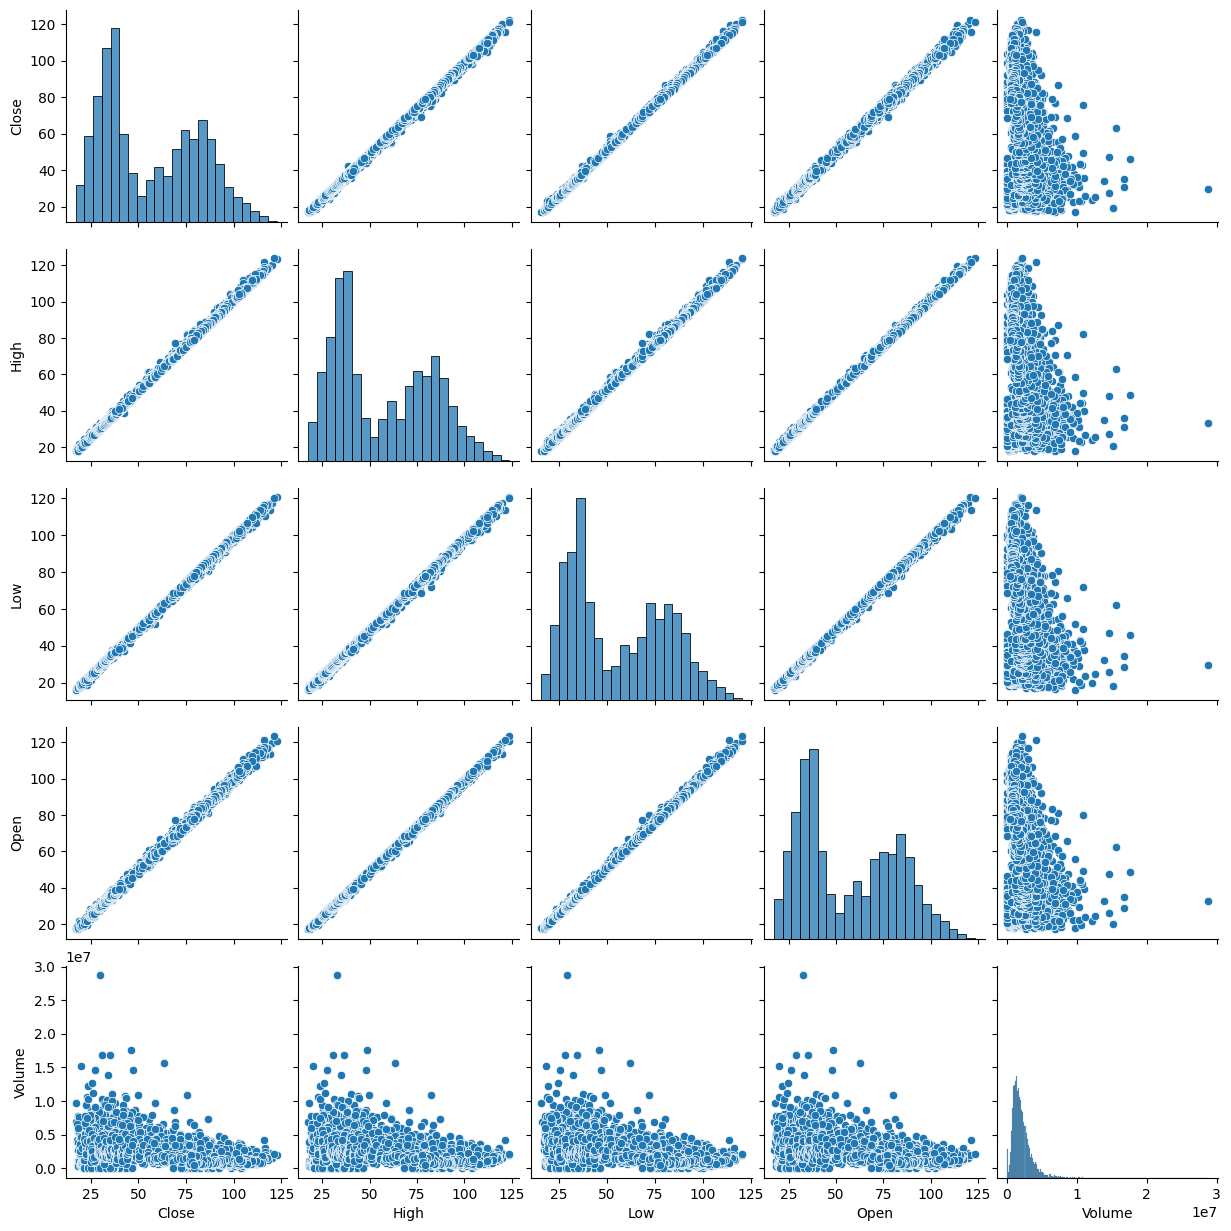

In [47]:
# Melihat korelasi dengan pairplot
selected_features = ['Close', 'High', 'Low', 'Open', 'Volume']
sns.pairplot(bmw_data[selected_features])
plt.show()

# PREPROCESSING DATA

Setelah saya melihat informasi dari dataset tersebut, diketahui tidak ada nilai kosong/null dalam dataset tersebut. sehingga kita akan melanjutkan preprocessing data untuk melihat tren dataset.

## Feature Selection
Dapat dilihat diatas bahwa kolom close, open, low, dan high berkorelasi sangat kuat, sedangkan volume memiliki performa korelasi yang negative terhadapat harga lainnya. Selanjutnya saya ingin memilih kolom "Close" sebagai target prediksi.

In [48]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Menghapus kolom Volume
bmw_data.drop(['Volume'], inplace=True, axis=1)
bmw_data.head()

# Features and target selection
X = bmw_data.drop(['Close'], axis=1)  # Features
y = bmw_data['Close']  # Target

## TRAIN TEST SPLIT

In [49]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=321)

In [50]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 7212
Total # of sample in train dataset: 5769
Total # of sample in test dataset: 1443


## STANDARDISASI

In [51]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['Adj_Close', 'High', 'Low', 'Open']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Adj_Close,High,Low,Open
Date,,,,
2003-08-06,-0.846551,-0.901251,-0.893047,-0.893242
1997-12-22,-1.065223,-1.285003,-1.274658,-1.290133
1998-11-20,-1.092351,-1.337662,-1.318720,-1.336943
2007-03-23,-0.604786,-0.505123,-0.487605,-0.496945
2013-12-03,0.517945,1.122353,1.110570,1.148933


# MODELLING

In [52]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'LinearRegression'])

## KNN (K-Nearest Neighbors)

In [53]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=12)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

## Random Forest

In [54]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor

# buat model prediksi
RF = RandomForestRegressor(n_estimators=45, max_depth=32, random_state=321, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

## LinearRegression

In [55]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train, y_train)
models.loc['train_mse','LinearRegression'] = mean_squared_error(y_pred=LR.predict(X_train), y_true=y_train)

# EVALUASI MODEL

In [56]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [57]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','LR'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'LR': LR}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
KNN,0.000237,0.000272
RF,0.000031,0.000213
LR,0.000191,0.000192


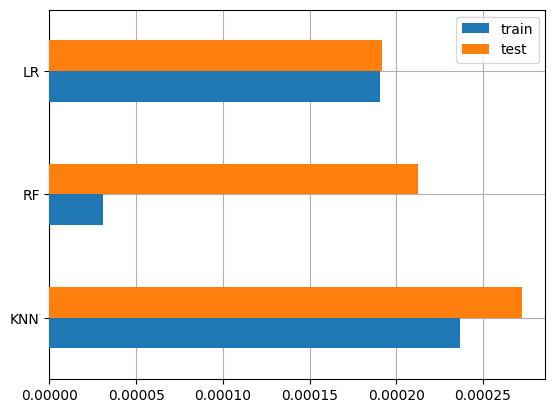

In [58]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [59]:
# Menampilkan 3 data baris untuk diprediksi berdasarkan tiap tiap algoritma model
prediksi = X_test.iloc[:3].copy()
pred_dict = {'y_true':y_test[:3]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_LR
Date,,,,
2015-07-03,98.900002,98.7,99.1,99.2
2018-11-23,73.489998,73.5,73.6,73.6
2010-04-08,34.529999,34.9,34.8,34.7


## Memilih model untuk visualisasi prediksi harga
Disini saya memilih model yang digunakan berdasarkan hasil matriks MSE yang ada bahwa model LR merupakan model dengan performa MSE yang paling rendah sehingga saya menggunakannya untuk prediksi. Garis merah putus - putus merupakan penanda bahwa prediksi harga dan harga aktual sempurna atau sama.

<ipython-input-60-866dccdfd84f>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


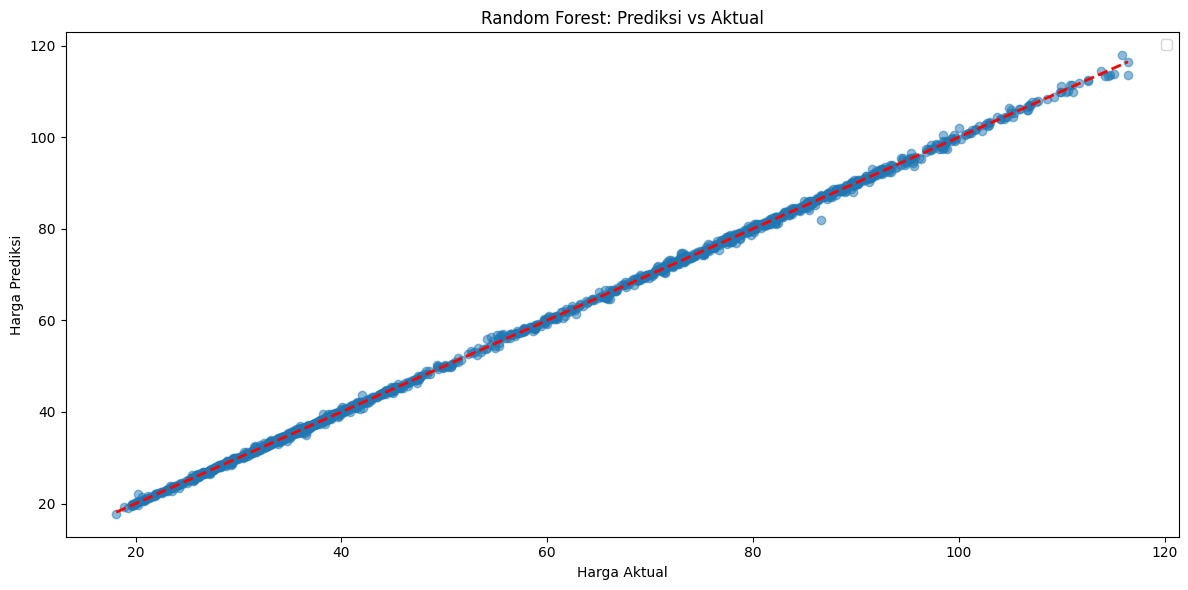

In [60]:
# Visualisasi prediksi vs aktual untuk model terbaik (Random Forest)
plt.figure(figsize=(12, 6))
y_pred_rf = RF.predict(X_test)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Harga Aktual')
plt.ylabel('Harga Prediksi')
plt.title('Random Forest: Prediksi vs Aktual')
plt.tight_layout()
plt.legend()
plt.show()